## Case 1

Riku Sykäri
Last edited: 04.02.2018
Cognitive Systems for Health Technology Applications
Helsinki Metropolia University of Applied Sciences
http://www.metropolia.fi/en/

## 1. Objectives




The objective in this case was to read data from a public dataset pertaining to heart disease diagnosis and to train a dense classifier network model using approx. 300 labeled training and test examples through supervised learning. The network in this case is a binary classifier, separating subjects to either 'healthy' or 'sick' categories.

## 2. Required libraries

In [144]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import sklearn as sk
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import keras
from keras import models
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

%matplotlib inline

# Versions used
print('numpy:', np.__version__)
print('pandas:', pd.__version__)
print('keras:', keras.__version__)
print('sklearn:', sk.__version__)

numpy: 1.12.1
pandas: 0.20.3
keras: 2.1.3
sklearn: 0.19.1


## 3. Data importation and preprocessing

In [145]:
# Import the data
filename = 'http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

colnames = ['age', 'sex', 'cp', 'tresbps', 'chol', 
            'fbs', 'restecg', 'thalach', 'exang', 
            'oldpeak', 'slope', 'ca', 'thal', 'num']

df = pd.read_csv(filename, 
                names = colnames,
                na_values = '?')

# Fill missing values with the mean values of the dataset
df = df.where(~np.isnan(df), df.mean(), axis = 'columns')

# Calculate the outputs where greater than zero equals True (sick), otherwise False (healthy)
labels = (df['num'] > 0).values

# Input data
columns = ['age', 'sex', 'cp', 'tresbps', 'chol', 
            'fbs', 'restecg', 'thalach', 'exang', 
            'oldpeak', 'slope', 'ca', 'thal']

data = df[columns].values

# Scale the data
min_max_scaler = preprocessing.MinMaxScaler()

# new_data = k*data + b
data_scaled = min_max_scaler.fit_transform(data)


## 4. Creating & Compiling the network model

In [146]:
# Specifying the hyperparameters
N = 300 # number of epochs
B = 128 # batch size
L = 1 # number of hidden layers
H = 5 # number of hidden neurons per layer

# Splitting the data into training and validation sets
pT = 0.25 # percentage of test cases
x_train, x_test, y_train, y_test = train_test_split(data_scaled, labels, 
                                                    random_state = 10, 
                                                    test_size = pT)

model = Sequential()
model.add(Dense(H, activation = 'relu', input_dim = 13))

for x in range(0, L):
    model.add(Dense(H, activation = 'relu'))
    
model.add(Dense(1, activation = 'sigmoid'))

# Model compilation
model.compile(loss = 'binary_crossentropy', 
             optimizer = 'rmsprop', 
             metrics = ['accuracy'])

## 5. Model Training

In [147]:
h = model.fit(x_train, y_train, 
              verbose = 0, 
              epochs = N, 
              batch_size = B,  
              validation_data = (x_test, y_test))

## 6. Evaluation

In [148]:
score = model.evaluate(x_test, y_test, verbose = 0)
print('Test score: ' + str(score[0]))
print('Test accuracy: ' + str(score[1]))

Test score: 0.355831108595
Test accuracy: 0.868421055769


## 7. Results

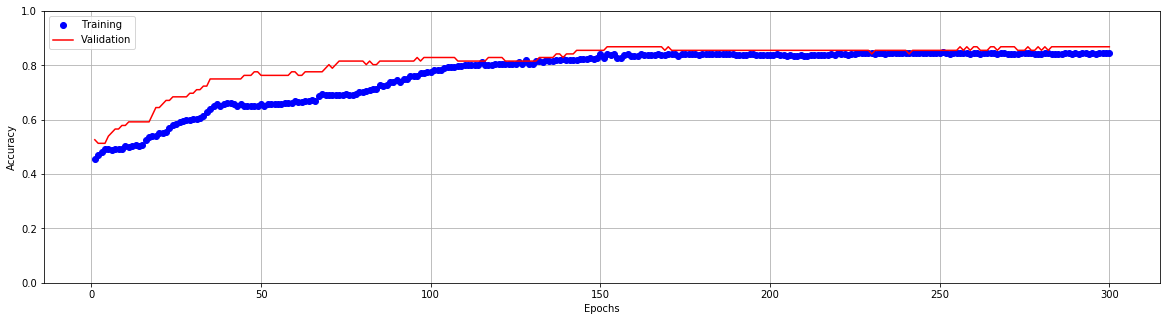

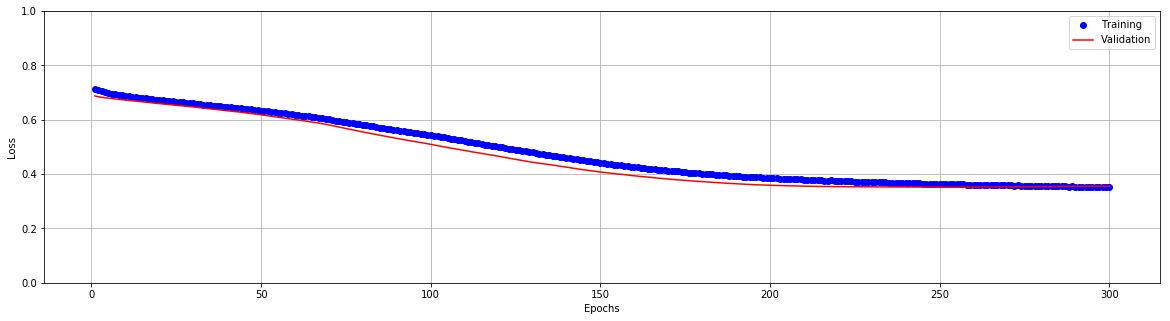

In [149]:
# Plot the results
epochs = range(1, N + 1) # inclusive, exclusive (in python)
acc = h.history['acc']
val_acc = h.history['val_acc']
loss = h.history['loss']
val_loss = h.history['val_loss']

# Accuracy plot
plt.figure(figsize = (20, 5))
plt.plot(epochs, acc, 'bo', label = 'Training')
plt.plot(epochs, val_acc, 'r-', label = 'Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.grid()
plt.legend()
plt.show()

# Loss plot
plt.figure(figsize = (20, 5))
plt.plot(epochs, loss, 'bo', label = 'Training')
plt.plot(epochs, val_loss, 'r-', label = 'Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.grid()
plt.legend()
plt.show()

## 8. Conclusions

After a series of tests using one, two or even several layers of varying widths between 2-10 neurons each, as well as batch sizes ranging all the way from 1 to 300 and epochs ranging from 100 to 500, it would appear that the best results come from using 1 hidden layer with 4 to 5 neurons and a batch size of several dozen samples. It seems that limiting the degrees of freedom through a smaller number of parameters in the network allows for many more epochs of meaningful parameter optimization without the risk of overfitting the training set. The search for an appropriate number of hidden neurons was assisted by the following formula:

Nh = Ns / (α ∗ (Ni + No))

Where   Nh corresponds to number of hidden neurons,
        Ns corresponds to number of training samples,
        α corresponds to a value between 2 and 10,
        Ni is the input dimension and
        No is the output dimension

Using a train/test split of 75%/25% and the model specified above, the network reaches 84-85% predictive accuracy on the test set, taken as an average of 5 trials that contained no outliers in training. I have little doubt that more accurate results would be attainable with more training examples.

Of particular note is the close parity between the training and test sets, in fact during testing there were numerous occasions where the test set achieved higher accuracy than the training set, a phenomenon I hadn't previously encountered when doing digit recognition. I suspect it is merely random occurrence due to the small dataset in question.